## **Seoul bike prediction**

In [32]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', 30)
np.random.seed(24)

In [33]:
data_path = "C:\\Users\\AbhinavPeddi\\datasets\\seoul_bike_data.csv"

In [34]:
#Load dataset
data = pd.read_csv(data_path, 
                   dtype={
                        'Duration': 'int64',
                        'Distance': 'int8',
                        'PLong':'float32',
                        'PLatd':'float32',
                        'DLong': 'float32',
                        'DLatd': 'float32',
                        'Haversine': 'float32',
                        'Pmonth': 'int8',
                        'Pday': 'int8',
                        'Phour': 'int8',
                        'Pmin':'int8',
                        'PDweek': 'int8',
                        'Dmonth': 'int8',
                        'Dday':'int8',
                        'Dhour': 'int8',
                        'Dmin': 'int8',
                        'DDweek':'int8',
                        'Temp': 'float32',
                        'Precip': 'float32',
                        'Wind': 'float32',
                        'humid': 'int64',
                        'Solar': 'float32',
                         'Snow':'float32',
                        'GroundTemp':'float32',
                        'Dust': 'float32'
}, index_col=0).sample(frac=1)
data = data.reset_index()
print(data.head())

   Duration  Distance      PLong       PLatd      DLong       DLatd  \
0         3       108  37.455799  127.016289  37.457424  127.022652   
1         3         6  37.488453  126.974213  37.485508  126.981621   
2        34         6  37.507233  127.056854  37.496914  127.024963   
3         2        62  37.645451  127.015617  37.641670  127.016884   
4        43        22  37.537849  127.092171  37.537010  127.082245   

   Haversine  Pmonth  Pday  Phour  Pmin  PDweek  Dmonth  Dday  Dhour  Dmin  \
0   0.590001       7     7     19    27       5       7     7     19    31   
1   0.731069       4     3      6    13       1       4     3      6    17   
2   3.038248       9    25     16    31       1       9    25     17     6   
3   0.434977      10     8      7    42       0      10     8      7    44   
4   0.880161       5    21     14    58       0       5    21     15    42   

   DDweek       Temp  Precip  Wind  Humid  Solar  Snow  GroundTemp  Dust  
0       5  26.100000     0.0 

In [35]:
data.shape

(1048575, 25)

In [36]:
#checking info of columns and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Duration    1048575 non-null  int64  
 1   Distance    1048575 non-null  int8   
 2   PLong       1048575 non-null  float32
 3   PLatd       1048575 non-null  float32
 4   DLong       1048575 non-null  float32
 5   DLatd       1048575 non-null  float32
 6   Haversine   1048575 non-null  float32
 7   Pmonth      1048575 non-null  int8   
 8   Pday        1048575 non-null  int8   
 9   Phour       1048575 non-null  int8   
 10  Pmin        1048575 non-null  int8   
 11  PDweek      1048575 non-null  int8   
 12  Dmonth      1048575 non-null  int8   
 13  Dday        1048575 non-null  int8   
 14  Dhour       1048575 non-null  int8   
 15  Dmin        1048575 non-null  int8   
 16  DDweek      1048575 non-null  int8   
 17  Temp        1048575 non-null  float32
 18  Precip      1048575 no

In [37]:
#memory usgae
data.memory_usage().sum()/1e6

78.643253

## **Exploratory Data Analysis**

In [38]:
#column names
print(data.columns)

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')


In [39]:
#description of the data
print(data.describe())

           Duration      Distance         PLong         PLatd         DLong  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   2.310148e+01  6.247027e+01  3.755648e+01  1.277442e+02  3.755630e+01   
std    2.284225e+01  4.037010e+01  4.512848e-02  7.577055e-01  4.514616e-02   
min    1.000000e+00 -1.280000e+02  3.743727e+01  1.267986e+02  3.743727e+01   
25%    7.000000e+00  3.200000e+01  3.751424e+01  1.269201e+02  3.751424e+01   
50%    1.400000e+01  6.400000e+01  3.754769e+01  1.269943e+02  3.754707e+01   
75%    3.100000e+01  9.600000e+01  3.757324e+01  1.270619e+02  3.757325e+01   
max    1.190000e+02  1.260000e+02  3.768972e+01  1.271803e+02  3.768972e+01   

              DLatd     Haversine        Pmonth          Pday         Phour  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.277446e+02  2.076850e+00  7.598532e+00  1.577433e+01  1.423703e+01   
std    7.582616e-01  1.997682e+00  2.712082e+00  8.

## **Observations**


## **Exploring the data points where Distance is -ve**

In [40]:
#shape where distance is negative
data[data['Distance']<0].shape

(9122, 25)

In [41]:
#data where distance is negative
data[data['Distance']<0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
93,6,-128,37.566246,126.896179,37.569084,126.894424,0.351442,7,27,12,27,4,7,27,12,33,4,33.700001,0.0,1.9,53,2.50,0.0,52.900002,35.0
255,13,-128,37.547733,126.931763,37.559177,126.934525,1.295601,9,7,20,43,4,9,7,20,57,4,21.600000,0.0,1.4,43,0.00,0.0,19.700001,13.0
288,1,-128,37.575138,126.913940,37.578892,126.910736,0.503954,12,20,8,52,3,12,20,8,54,3,-1.000000,0.0,0.7,56,0.00,0.0,-2.500000,60.0
394,3,-128,37.521362,126.923462,37.524612,126.927834,0.528450,10,25,14,22,3,10,25,14,26,3,20.600000,0.0,1.4,31,1.70,0.0,24.700001,59.0
546,3,-128,37.504379,126.888298,37.508194,126.891304,0.500262,8,18,16,18,5,8,18,16,22,5,31.799999,0.0,2.1,33,1.88,0.0,47.000000,13.0


transforming all negative distances to postive(considering user has travelled backwards data point is taken as -ve)

In [42]:
#transformation
data['Distance'] = data['Distance'].apply(lambda x: abs(x))

In [43]:
data[data['Distance']<0].shape

(0, 25)

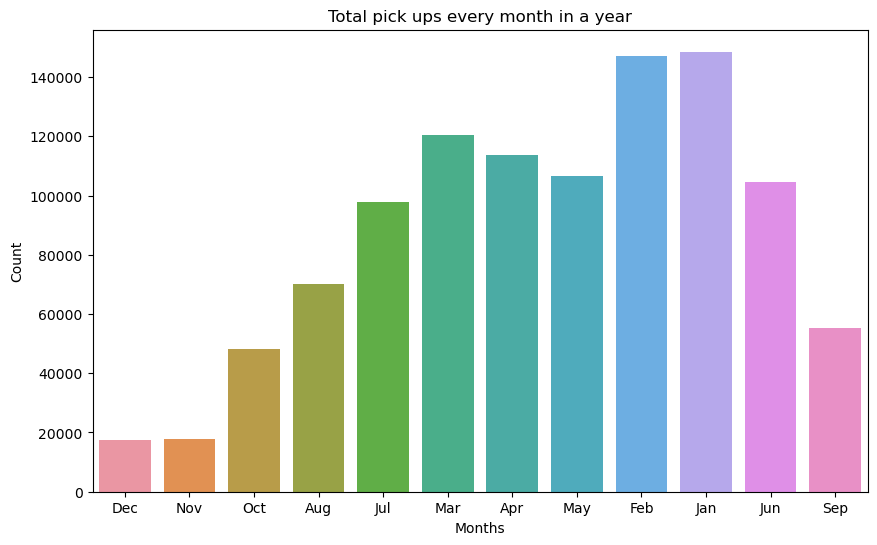

In [44]:
#plotting Total pick ups every month ina year
temp = data['Pmonth'].value_counts()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pick_up_months = temp.index
trips_count = temp.values
plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months, y=trips_count)
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(pick_up_months-1, month_labels)
plt.title('Total pick ups every month in a year')
plt.show()

<Figure size 1200x600 with 0 Axes>

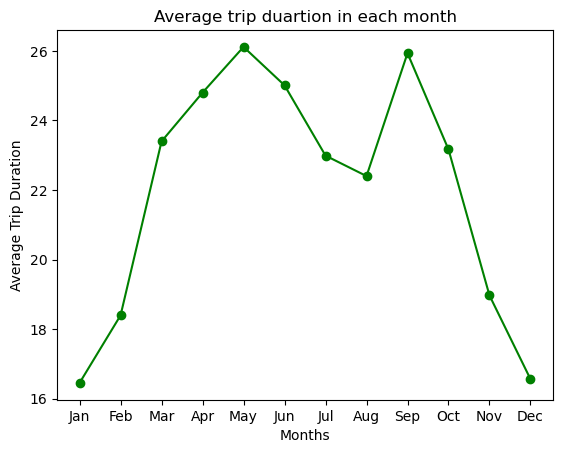

In [45]:
#plotting Average trip duartion in each month
temp = data.groupby('Pmonth')['Duration'].mean()
pick_up_months = temp.index
plt.figure(figsize=(12,6))
plt.figure(f'Average trip duartion in each month')
plt.plot(temp.index, temp.values, 'g-o')
plt.xlabel('Months')
plt.ylabel('Average Trip Duration')
plt.title('Average trip duartion in each month')
plt.xticks(pick_up_months, month_labels)
plt.show()

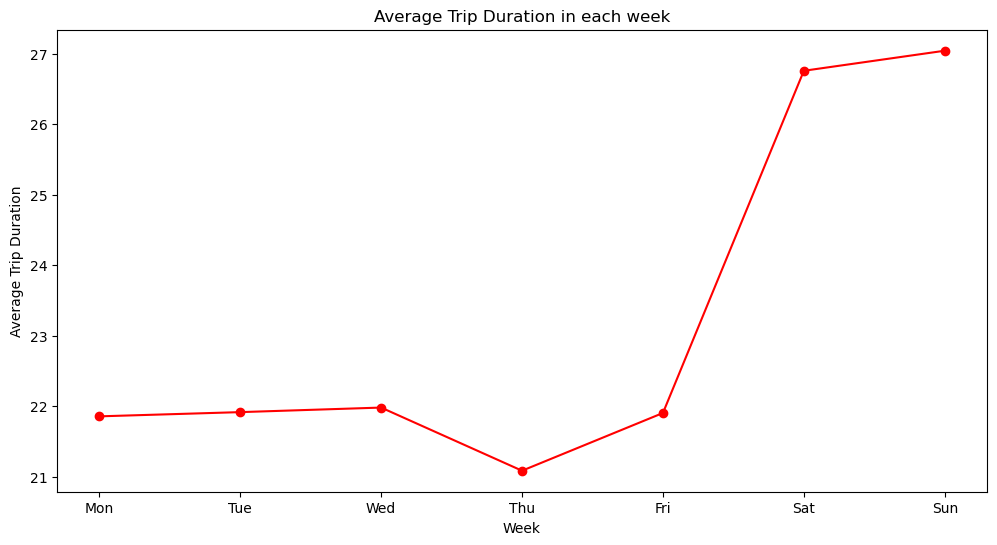

In [46]:
#plotting Average duration per week
temp = data.groupby('PDweek')['Duration'].mean()
plt.figure(figsize=(12,6))
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(temp.index, temp.values, 'g-o', color ='red')
plt.xlabel('Week')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration in each week')
plt.xticks(temp.index, week)
plt.show()

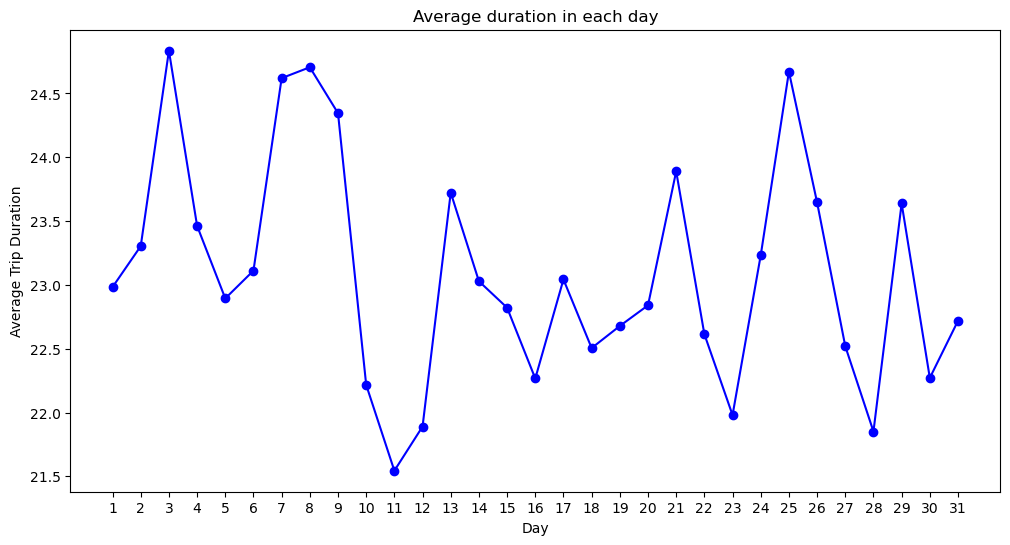

In [47]:
#plotting Average duration per day
temp = data.groupby('Pday')['Duration'].mean()
plt.figure(figsize=(12,6))
day = np.arange(1, 32)
plt.plot(temp.index, temp.values, 'g-o', color='blue')
plt.xlabel('Day')
plt.ylabel('Average Trip Duration')
plt.title('Average duration in each day')
plt.xticks(temp.index, day)
plt.show()

## **Observations**

1. From Total pickups every month ina year plot, More number of pickups happen during January and February months.
2. From Average trip duration in each month plot, The average trip duration is leass during months: November, December, January and February. 
3. From Average trip duration in each day of a week plot, we can observe that the average trip duration is high during weekends.
4. From Average trip duration on each hour in a day plot, The average trip duration is high during 15th, 16th and 20th hours of the day

From the above factors we can say that temperature and time are the influential factors for trip duration estimation.

In [48]:
#continous data columns and categorical data columns
continous_data_columns = [column_name for column_name in data.columns if data[column_name].nunique()>40]
categorical_data_columns = [column_name for column_name in data.columns if column_name not in continous_data_columns]
print('continous_data_columns:', continous_data_columns)
print('categorical_data_columns:', categorical_data_columns)

continous_data_columns: ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
categorical_data_columns: ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


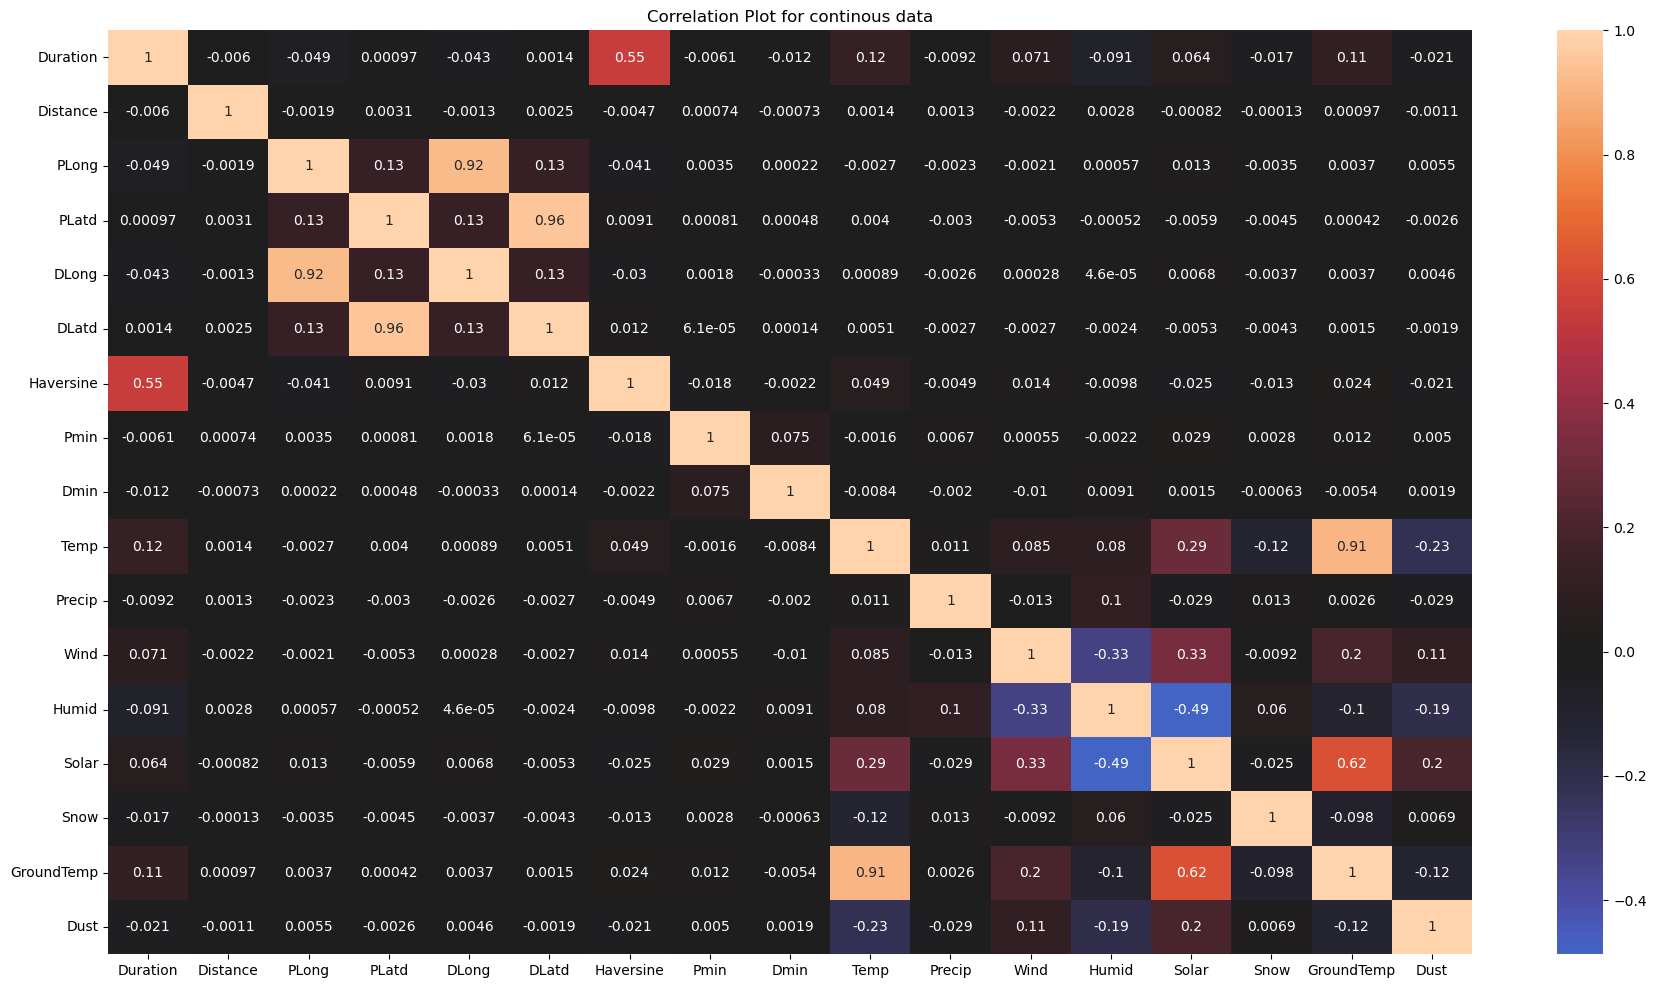

In [49]:
#plot correlation matrix for continous_data
plt.figure(figsize=(22,12))
sns.heatmap(data[continous_data_columns].corr(), annot=True, center=0)
plt.title('Correlation Plot for continous data')
plt.show()

## **Observations**
1. Plong and DLong are highly correlated, but these represent the pick up and drop off longitudes.
2. Platd, Dlatd are highly correlated, but these represent the pick up and drop off latitudes.
3. Temp and GroundTemp are highly correlated, and Temp has more correlation with duration(target data) when compared with Ground Temp

## **Model Building**

In [50]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Duration'], axis=1), data['Duration'], test_size=0.25, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(786431, 24) (786431,)
(262144, 24) (262144,)


In [51]:
#definning fucntions
def rmse(y_true, predictions):
        return mean_squared_error(y_true, predictions)**0.5
    
def get_metrics(y_true, predictions):
    print('='*50)
    print(f'MAE: {mean_absolute_error(y_true, predictions)}')
    print(f'MSE: {mean_squared_error(y_true, predictions)}')
    print(f'RMSE: {rmse(y_true, predictions)}')
    print(f'R2 score: {r2_score(y_true, predictions)}')
    print('='*50)
    
def r2score(y_true, predictions):
    return r2_score(y_true, predictions)

## **Scaling the data**


In [52]:
%%time
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Wall time: 370 ms


## **Linear regression**


In [53]:
%%time
linear_reg_model = LinearRegression()
linear_reg_model.fit(scaled_X_train, y_train)

Wall time: 479 ms


LinearRegression()

In [54]:
preds = linear_reg_model.predict(scaled_X_test)
get_metrics(y_test,preds)

MAE: 12.061765788646182
MSE: 345.348566004216
RMSE: 18.583556333603536
R2 score: 0.33828516203956993


In [55]:
preds = linear_reg_model.predict(scaled_X_train)
get_metrics(y_train, preds)

MAE: 12.105314340562622
MSE: 349.0420543830527
RMSE: 18.68266721812099
R2 score: 0.33098234556024553


## **XGBoost Regressor**

In [56]:
%%time
xgb_model = XGBRegressor(random_state=4)
xgb_model.fit(X_train, y_train)

Wall time: 30.5 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=4, ...)

In [57]:
preds = xgb_model.predict(X_test)
get_metrics(y_test, preds)

MAE: 2.882226479461899
MSE: 27.607258718955215
RMSE: 5.254261005979358
R2 score: 0.9471023350665307


In [58]:
preds = xgb_model.predict(X_train)
get_metrics(y_train, preds)

MAE: 2.8179852381614086
MSE: 25.498707125578168
RMSE: 5.049624453915179
R2 score: 0.9511259889225863


## **Random Forest Regressor**

In order to reduce the training time, RFE will be implemented on 6% of the data to find teh best_params and using the best params will run RFE of entire dataset

In [59]:
#creating the frac sample
frac_data = data.sample(frac=0.06)
print(frac_data.head())

        Duration  Distance      PLong       PLatd      DLong       DLatd  \
310403        15        84  37.639580  127.065102  37.620369  127.083641   
111506        12        52  37.524666  126.918022  37.526386  126.902756   
128218        23       126  37.575794  126.971451  37.569183  127.009880   
628920        36        56  37.643757  127.064987  37.619171  127.074928   
784043        13        14  37.556000  126.910454  37.555496  126.936340   

        Haversine  Pmonth  Pday  Phour  Pmin  PDweek  Dmonth  Dday  Dhour  \
310403   2.688608       9     9     23     6       6       9     9     23   
111506   1.359777       5    28     18    30       0       5    28     18   
128218   3.465657       3    23     12    35       4       3    23     13   
628920   2.870584       9    10      0     8       0       9    10      0   
784043   2.282567       6     6      1    10       2       6     6      1   

        Dmin  DDweek       Temp  Precip  Wind  Humid  Solar  Snow  GroundTemp  \

In [60]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(frac_data.drop(columns=['Duration'], axis=1), frac_data['Duration'], test_size=0.1, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56622, 24) (56622,)
(6292, 24) (6292,)


## **Hyperparameter Optimization of Random Forest**


In [61]:
%%time
rf_model = RandomForestRegressor(random_state=24)
rf_model.fit(X_train, y_train)

Wall time: 58.1 s


RandomForestRegressor(random_state=24)

In [62]:
predictions = rf_model.predict(X_test)
print('On the test data')
get_metrics(y_test, predictions)

On the test data
MAE: 6.93006993006993
MSE: 136.04194421487605
RMSE: 11.663701994430244
R2 score: 0.7356938388290065


In [63]:
predictions = rf_model.predict(X_train)
print('On the train data')
get_metrics(y_train, predictions)

On the train data
MAE: 2.615585814701
MSE: 20.019871046589667
RMSE: 4.474357053989955
R2 score: 0.9621890189645169


In [64]:
#sample grid
n_estimators=[10,20,30,40]
min_samples_split=[2,3,4,5]
min_samples_leaf = [2,3,4,5]
random_grid = {'n_estimators': n_estimators,
              'min_samples_split': min_samples_split,
              'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [10, 20, 30, 40],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [2, 3, 4, 5]}

In [65]:
%%time
rf=RandomForestRegressor(random_state=24)
rf_grid_search = GridSearchCV(rf, param_grid = random_grid, cv=3, verbose=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Wall time: 7min 8s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=24), n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=3)

In [66]:
rf_grid_search.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}

In [67]:
final_rf_model = rf_grid_search.best_estimator_
final_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=40,
                      random_state=24)

In [68]:
predictions = final_rf_model.predict(X_test)
print('On the test data')
get_metrics(y_test, predictions)

On the test data
MAE: 6.901197770021971
MSE: 137.6515314462113
RMSE: 11.732498942945245
R2 score: 0.7325666869447897


In [69]:
predictions = final_rf_model.predict(X_train)
print('On the train data')
get_metrics(y_train, predictions)

On the train data
MAE: 3.2999086130825854
MSE: 36.714669765579146
RMSE: 6.059263137179235
R2 score: 0.9306580107834003


Model overfits the data however, we're looking for best_params
## **Applying best_params on entire dataset**

In [70]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Duration'], axis=1), data['Duration'], test_size=0.25, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(786431, 24) (786431,)
(262144, 24) (262144,)


In [71]:
%%time
rf_model = RandomForestRegressor(**{'min_samples_leaf':2, 'min_samples_split':2, 'n_estimators':40}, random_state=24, n_jobs=-1)
rf_model.fit(X_train, y_train)

Wall time: 1min 59s


RandomForestRegressor(min_samples_leaf=2, n_estimators=40, n_jobs=-1,
                      random_state=24)

In [72]:
predictions = rf_model.predict(X_test)
print('On the test data')
get_metrics(y_test, predictions)

On the test data
MAE: 2.9953485372124984
MSE: 44.83034975294638
RMSE: 6.695547009240275
R2 score: 0.9141015468350948


In [73]:
predictions = rf_model.predict(X_train)
print('On the test data')
get_metrics(y_train, predictions)

On the test data
MAE: 1.3457429121634779
MSE: 9.944766236358985
RMSE: 3.1535323426847843
R2 score: 0.9809386172873626


In [76]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({
    'Model': ['Linear regressor', 'XGBoost', 'Random Forest regressor'],
    'Train Score': [0.33, 0.95, 0.98],
    'Test Score': [0.33, 0.94, 0.91]
})
print(models)

                     Model  Train Score  Test Score
0         Linear regressor         0.33        0.33
1                  XGBoost         0.95        0.94
2  Random Forest regressor         0.98        0.91


We can conclude that XGBoost is the best model for the probelm statement when compared to linear regressor and random Forest regressor as it doesn't overfit the data